***1. Data Loading***

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
import math
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/DataMining/Datasets/Selected_Features.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [103]:
y


array(['Mild', 'Moderate', 'Moderate', 'Extreme', 'Moderate', 'Moderate',
       'Moderate', 'Minimal', 'Moderate', 'Extreme', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Extreme', 'Mild', 'Extreme', 'Minimal',
       'Mild', 'Moderate', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Moderate', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Moderate',
       'Extreme', 'Mild', 'Mild', 'Extreme', 'Mild', 'Extreme',
       'Moderate', 'Minimal', 'Extreme', 'Mild', 'Moderate', 'Mild',
       'Mild', 'Minimal', 'Extreme', 'Extreme', 'Minimal', 'Mild', 'Mild',
       'Minimal', 'Extreme', 'Moderate', 'Extreme', 'Extreme', 'Extreme',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Extreme', 'Moderate', 'Mild', 'Minimal', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Mild', 'Mild',
       'Extreme', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Minimal',
       'Minimal', 'Extreme', 'Extreme', 'Mild', 'Moderate', 'Moderate',
       'Extre

***Random Forest***

[[34  6  0  6]
 [ 5 17 13 10]
 [ 0  8 36  2]
 [ 4  3  3 23]]
Accuracy -  0.6470588235294118
Recall -  0.6491216512955644
Precision -  0.6359952441205987
F1 Score -  0.6424914100067108


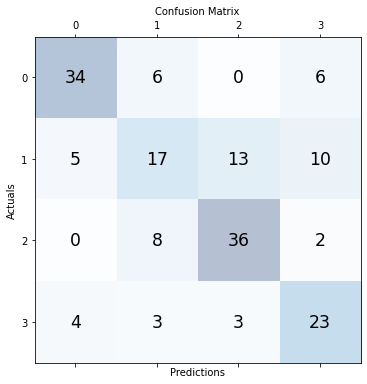

              precision    recall  f1-score   support

     Extreme       0.79      0.74      0.76        46
        Mild       0.50      0.38      0.43        45
     Minimal       0.69      0.78      0.73        46
    Moderate       0.56      0.70      0.62        33

    accuracy                           0.65       170
   macro avg       0.64      0.65      0.64       170
weighted avg       0.64      0.65      0.64       170



In [104]:
# Splitting the dataset into the Training set and Test set
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)
test_pred = []
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
test_pred.append([y_test, y_pred])

acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=1, average='macro')
pres_score = precision_score(y_test, y_pred, pos_label=1, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)


# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)


# # g_mean = math.sqrt(tp*tn)


# g_mean = math.sqrt(sensitivity*specificity)
print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
# print("G-Mean - ", g_mean)


fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))

In [105]:
y

array(['Mild', 'Moderate', 'Moderate', 'Extreme', 'Moderate', 'Moderate',
       'Moderate', 'Minimal', 'Moderate', 'Extreme', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Extreme', 'Mild', 'Extreme', 'Minimal',
       'Mild', 'Moderate', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Moderate', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Moderate',
       'Extreme', 'Mild', 'Mild', 'Extreme', 'Mild', 'Extreme',
       'Moderate', 'Minimal', 'Extreme', 'Mild', 'Moderate', 'Mild',
       'Mild', 'Minimal', 'Extreme', 'Extreme', 'Minimal', 'Mild', 'Mild',
       'Minimal', 'Extreme', 'Moderate', 'Extreme', 'Extreme', 'Extreme',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Extreme', 'Moderate', 'Mild', 'Minimal', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Mild', 'Mild',
       'Extreme', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Minimal',
       'Minimal', 'Extreme', 'Extreme', 'Mild', 'Moderate', 'Moderate',
       'Extre

***SVM***

[[28  2  1 15]
 [ 2 15 10 18]
 [ 1  8 37  0]
 [ 3  9  1 20]]
Accuracy -  0.5882352941176471
Recall -  0.5881093544137023
Precision -  0.5992916034338263
F1 Score -  0.593647824977209


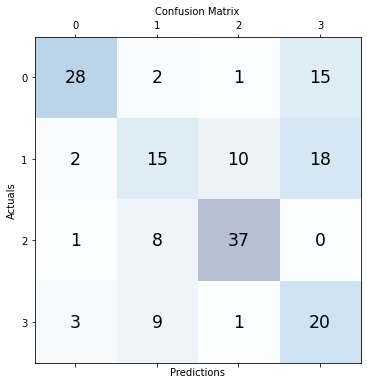

              precision    recall  f1-score   support

     Extreme       0.82      0.61      0.70        46
        Mild       0.44      0.33      0.38        45
     Minimal       0.76      0.80      0.78        46
    Moderate       0.38      0.61      0.47        33

    accuracy                           0.59       170
   macro avg       0.60      0.59      0.58       170
weighted avg       0.62      0.59      0.59       170



In [116]:
# Splitting the dataset into the Training set and Test set
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)
#x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
test_pred.append([y_test, y_pred])
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=1, average='macro')
pres_score = precision_score(y_test, y_pred, pos_label=1, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)


# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)


# # g_mean = math.sqrt(tp*tn)


# g_mean = math.sqrt(sensitivity*specificity)
print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
# print("G-Mean - ", g_mean)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))

In [107]:
len(y_train)

678

In [108]:
len(X_train)

678

***Gaussian Naive Bayes***

[[23  3  4 16]
 [ 4  6 20 15]
 [ 0  2 41  3]
 [ 8  4  8 13]]
Accuracy -  0.48823529411764705
Recall -  0.47964426877470356
Precision -  0.47384560936003667
F1 Score -  0.4767273067611556


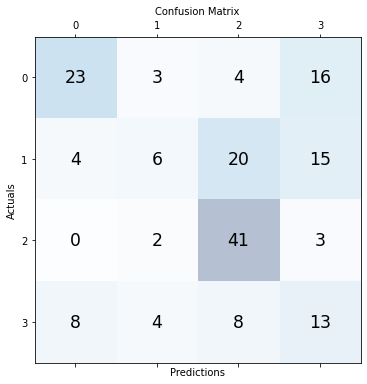

              precision    recall  f1-score   support

     Extreme       0.66      0.50      0.57        46
        Mild       0.40      0.13      0.20        45
     Minimal       0.56      0.89      0.69        46
    Moderate       0.28      0.39      0.33        33

    accuracy                           0.49       170
   macro avg       0.47      0.48      0.45       170
weighted avg       0.49      0.49      0.46       170



In [109]:
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
test_pred.append([y_test, y_pred])

acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=1, average='macro')
pres_score = precision_score(y_test, y_pred, pos_label=1, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)


# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)


# g_mean = math.sqrt(tp*tn)


# g_mean = math.sqrt(sensitivity*specificity)
print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
# print("G-Mean - ", g_mean)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))

***Logistic Regression***

[[28  1  0 17]
 [ 3 13 11 18]
 [ 1  7 37  1]
 [ 6  8  2 17]]
Accuracy -  0.5588235294117647
Recall -  0.5542709705753184
Precision -  0.5614681710783138
F1 Score -  0.557846357652183


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


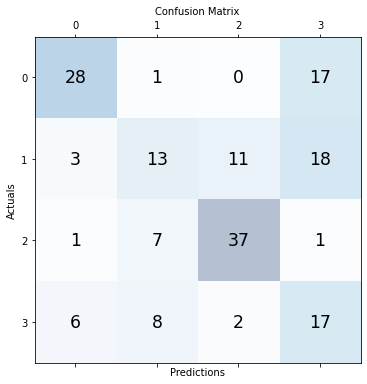

              precision    recall  f1-score   support

     Extreme       0.74      0.61      0.67        46
        Mild       0.45      0.29      0.35        45
     Minimal       0.74      0.80      0.77        46
    Moderate       0.32      0.52      0.40        33

    accuracy                           0.56       170
   macro avg       0.56      0.55      0.55       170
weighted avg       0.58      0.56      0.56       170



In [110]:
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
test_pred.append([y_test, y_pred])
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=1, average='macro')
pres_score = precision_score(y_test, y_pred, pos_label=1, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)


# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)


# g_mean = math.sqrt(tp*tn)


# g_mean = math.sqrt(sensitivity*specificity)
print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
# print("G-Mean - ", g_mean)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))

***Adaboost***

Accuracy -  0.6470588235294118
Recall -  0.6554238032498902
Precision -  0.6524090616161254
F1 Score -  0.6539129577278822


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


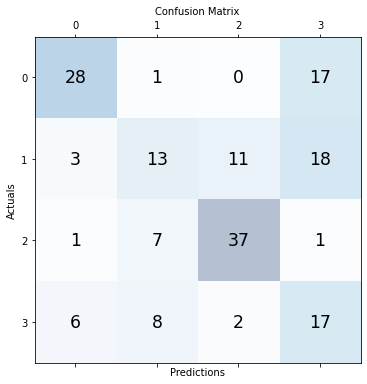

              precision    recall  f1-score   support

     Extreme       0.85      0.63      0.72        46
        Mild       0.52      0.36      0.42        45
     Minimal       0.75      0.85      0.80        46
    Moderate       0.49      0.79      0.60        33

    accuracy                           0.65       170
   macro avg       0.65      0.66      0.64       170
weighted avg       0.67      0.65      0.64       170



In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

base_classifier = DecisionTreeClassifier(max_depth=10)
classifier= AdaBoostClassifier(base_estimator=base_classifier)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=0, average='macro') # binary?
pres_score = precision_score(y_test, y_pred, pos_label=0, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)
# g_mean = geometric_mean_score(y_test, y_pred)

print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))

***XgBoost***

[[44  1  0  1]
 [ 1 37  4  3]
 [ 1  1 44  0]
 [ 0  1  0 32]]
Accuracy -  0.9235294117647059
Recall -  0.9262406675450154
Precision -  0.9217693236714976
F1 Score -  0.9239995862987478


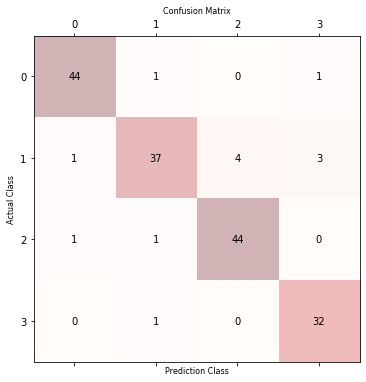

              precision    recall  f1-score   support

     Extreme       0.96      0.96      0.96        46
        Mild       0.93      0.82      0.87        45
     Minimal       0.92      0.96      0.94        46
    Moderate       0.89      0.97      0.93        33

    accuracy                           0.92       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.92      0.92      0.92       170



In [112]:
# smote_on_1 = 212
# smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
# X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X, y)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

test_pred.append([y_test, y_pred])
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=1, average='macro')
pres_score = precision_score(y_test, y_pred, pos_label=1, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)




# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)


# # g_mean = math.sqrt(tp*tn)


# g_mean = math.sqrt(sensitivity*specificity)
print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
# print("G-Mean - ", g_mean)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Prediction Class', fontsize=8)
plt.ylabel('Actual Class', fontsize=8)
plt.title('Confusion Matrix', fontsize=8)
plt.show()
print(metrics.classification_report(y_test, y_pred))

In [113]:
len(y_test)

170

***Bagging***

Accuracy -  0.6294117647058823
Recall -  0.6267566974088713
Precision -  0.6357764235915496
F1 Score -  0.6312343413611411


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


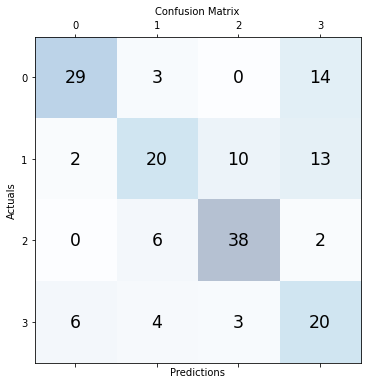

              precision    recall  f1-score   support

     Extreme       0.78      0.63      0.70        46
        Mild       0.61      0.44      0.51        45
     Minimal       0.75      0.83      0.78        46
    Moderate       0.41      0.61      0.49        33

    accuracy                           0.63       170
   macro avg       0.64      0.63      0.62       170
weighted avg       0.65      0.63      0.63       170



In [114]:
smote_on_1 = 212
smote = SMOTE(sampling_strategy={'Minimal': smote_on_1,'Moderate': smote_on_1, 'Extreme': smote_on_1})
X, y = smote.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier(max_depth=10)
classifier= BaggingClassifier(base_estimator=base_classifier)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, pos_label=0, average='macro') # binary?
pres_score = precision_score(y_test, y_pred, pos_label=0, average='macro')
f1_score = 2 * (pres_score * rec_score) / (pres_score + rec_score)
# g_mean = geometric_mean_score(y_test, y_pred)

print("Accuracy - ", acc_score)
print("Recall - ", rec_score)
print("Precision - ", pres_score)
print("F1 Score - ", f1_score)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()
print(metrics.classification_report(y_test, y_pred))